In [3]:
smoke_config = '/disk/xxiong52/mmyolo/configs/yolov8/_yolov8_l_no_mask_frozen.py'
!python /disk/xxiong52/mmyolo/tools/train.py {smoke_config} 

03/18 21:17:46 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
/bin/sh: 1: x86_64-conda_cos7-linux-gnu-gcc: not found
03/18 21:17:47 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.17 (default, Jul  5 2023, 21:04:15) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1138350726
    GPU 0,1: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr
    NVCC: Cuda compilation tools, release 10.1, V10.1.24
    GCC: n/a
    PyTorch: 1.10.1
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 2023

In [4]:
smoke_config = '/disk/xxiong52/mmyolo/configs/yolov8/_yolov8_l_no_mask_frozen.py'
best_pth = '/disk/xxiong52/Dataset/wildfire/smoke/work_dirs/_yolov8_l_no_mask_frozen/best_coco_bbox_mAP_epoch_50.pth'
!python /disk/xxiong52/mmyolo/tools/test.py {smoke_config} {best_pth}

03/18 23:00:30 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
/bin/sh: 1: x86_64-conda_cos7-linux-gnu-gcc: not found
03/18 23:00:31 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.17 (default, Jul  5 2023, 21:04:15) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 163449162
    GPU 0,1: NVIDIA GeForce RTX 3090
    CUDA_HOME: /usr
    NVCC: Cuda compilation tools, release 10.1, V10.1.24
    GCC: n/a
    PyTorch: 1.10.1
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230

In [21]:
smoke_config = '/disk/xxiong52/mmyolo/configs/yolov8/_yolov8_l_no_mask_frozen.py'
best_pth = '/disk/xxiong52/Dataset/wildfire/smoke/work_dirs/_yolov8_l_unfrozen_smoke/best_coco_bbox_mAP_epoch_100.pth'
!python /disk/xxiong52/mmyolo/demo/image_demo.py ./test_images \
                          {smoke_config} \
                          {best_pth}\
                          --out-dir ./test_results \
                          --score-thr 0.2 \
                          --to-labelme

Loads checkpoint by local backend from path: /disk/xxiong52/Dataset/wildfire/smoke/work_dirs/_yolov8_l_unfrozen_smoke/best_coco_bbox_mAP_epoch_100.pth
/home/xxiong52/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
[                                                  ] 0/4880, elapsed: 0s, ETA:/home/xxiong52/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 4880/4880, 7.1 task/s, elapsed: 692s, ETA:     0s
Label

In [22]:
import os
import json
# Define the path to the folder containing your JSON files
folder_path = "/disk/xxiong52/Dataset/wildfire/smoke/test_results"

# Initialize counters

plus_count = 0
minus_count = 0
falsenegative = 0
truepositive = 0
falsepositive  = 0
truenegative = 0
# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a JSON file
    if file_name.endswith('.json'):
        # Create the full path to the JSON file
        file_path = os.path.join(folder_path, file_name)
        
        # Open the JSON file and load its contents
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            
            # Extract the filename from the imagePath
            image_path = data.get("imagePath", "N/A")
            if image_path:
                file_name = os.path.basename(image_path)
                
                # Check if the filename contains a '+' or '-'
                if '+' in file_name:
                    plus_count += 1
                    if not data.get("shapes"):
                        falsenegative += 1
                    else:
                        truepositive += 1
                elif '-' in file_name:
                    minus_count += 1
                    if not data.get("shapes"):
                        truenegative += 1
                    else:
                        falsepositive += 1
                else:
                    print("Filename does not contain a '+' or '-'")
                    continue  # Skip further processing if '+' or '-' is not present
            

In [23]:
plus_count, minus_count, falsenegative, truepositive, falsepositive, truenegative

(2469, 2411, 1351, 1118, 164, 2247)

In [24]:
falsepositive/(falsepositive + truenegative) #fpr

0.06802156781418499

In [27]:
Accuracy = (truepositive + truenegative)/(plus_count + minus_count) #accuracy
Precision = truepositive/(truepositive + falsepositive) #precision
Recall = truepositive/(truepositive + falsenegative) #recall    
F1 = 2 * (Precision * Recall) / (Precision + Recall) #f1
Accuracy, Precision, Recall, F1

(0.6895491803278688,
 0.8720748829953198,
 0.4528149048197651,
 0.5961077046121034)

In [36]:
plus_count, minus_count, falsenegative, truepositive, falsepositive, truenegative

(2469, 2411, 1324, 1145, 384, 2027)

In [19]:
1145/(1145+384)

0.7488554610856769

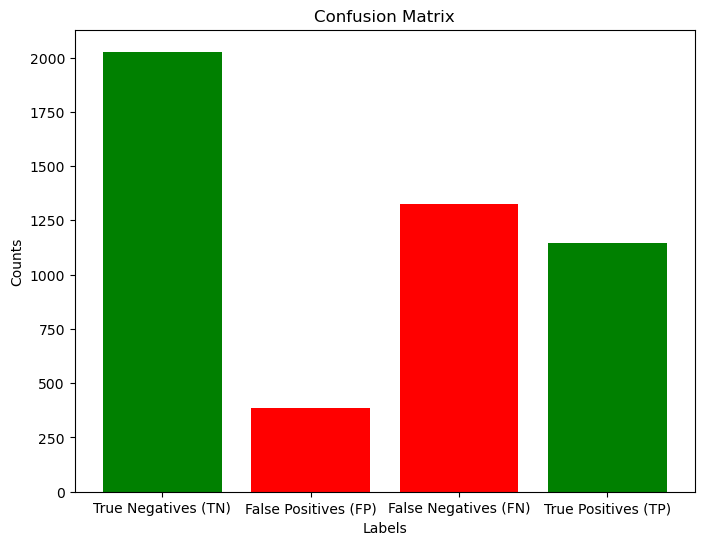

In [37]:
import matplotlib.pyplot as plt

# Define the counts for TP, TN, FP, FN
fn = falsenegative
tp = truepositive
fp = falsepositive
tn = truenegative

# Define the labels for the confusion matrix
labels = ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)']

# Define the counts for each label
counts = [tn, fp, fn, tp]

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['green', 'red', 'red', 'green'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Confusion Matrix')
plt.show()

In [38]:
(tn+tp)/(tn+tp+fn+fp)

0.65

In [39]:
fp/(tp+fp)

0.2511445389143231

In [40]:
precision = tp / (tp + fp)

recall = tp / (tp + fn)

In [41]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.5727863931965983

In [6]:
smoke_config = '/disk/xxiong52/mmyolo/configs/yolov8/_yolov8_l_unfrozen_smoke.py'
best_pth = '/disk/xxiong52/Dataset/wildfire/smoke/work_dirs/_yolov8_l_unfrozen_smoke/best_coco_bbox_mAP_epoch_100.pth'
!python /disk/xxiong52/mmyolo/demo/image_demo.py ./visualized_results/gif \
                          {smoke_config} \
                          {best_pth}\
                          --out-dir ./viz_gif \
                          --score-thr 0.3 

Loads checkpoint by local backend from path: /disk/xxiong52/Dataset/wildfire/smoke/work_dirs/_yolov8_l_unfrozen_smoke/best_coco_bbox_mAP_epoch_100.pth
03/20 22:46:39 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/81, elapsed: 0s, ETA:/home/xxiong52/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180588308/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[                                  ] 2/81, 1.2 task/s, elapsed: 2s, ETA:    65s/home/xxiong52/miniconda3/envs/openmmlab/lib/python3.8/site-packages/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorc

In [1]:
import os
import imageio

# Folder containing images
folder_path = '/disk/xxiong52/Dataset/wildfire/smoke/viz_gif'

# Output GIF file name
output_gif = 'output.gif'

# List to store image file names
images = []

# Read all images in the folder
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.jpg'):
        images.append(os.path.join(folder_path, filename))

In [18]:
# Create GIF
output_gif = 'output_short.gif'
with imageio.get_writer(output_gif, mode='I', duration=0.05) as writer:
    for image in images:
        frame = imageio.imread(image)
        writer.append_data(frame)

/tmp/ipykernel_3300201/2273723681.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(image)


In [19]:
frames = []
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith('.jpg'):
        frames.append(imageio.imread(os.path.join(folder_path, filename)))

/tmp/ipykernel_3300201/1877186559.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join(folder_path, filename)))


In [20]:
exportname = "output_slow.gif"
kargs = { 'duration': 5 }
imageio.mimsave(exportname, frames, 'GIF', **kargs)

In [2]:
# Read the first image to get dimensions
output_video = 'viz.mp4'
import cv2
first_image = cv2.imread(images[0])
height, width, _ = first_image.shape

# Initialize the VideoWriter object
video = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), 2, (width, height))

# Write images to video
for image in images:
    frame = cv2.imread(image)
    video.write(frame)

# Release VideoWriter
video.release()

In [4]:
import json
import os
def load_json_files(directory):
    json_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".json"):
            _, time = filename.split("_")
            time = int(time.split(".")[0])  # Removing the ".json" extension and converting to int
            # Increment count based on whether shapes is empty or not
            with open(os.path.join(directory, filename), 'r') as file:
                data = json.load(file)
                if data.get("shapes"):
                    json_data[time] = json_data.get(time, 0) + 1
    return json_data

In [5]:
directory = "/disk/xxiong52/Dataset/wildfire/smoke/test_results"
json_data = load_json_files(directory)

In [7]:

# Calculate sum of counts for times where -2400 < time < 0
selected_times = [time for time in json_data if -2400 < time < 0]
sum_counts = sum(json_data[time] for time in selected_times)
sum_counts

78

In [13]:
selected_times = [time for time in json_data if 0 < time < 2800]
sum_counts = sum(json_data[time] for time in selected_times)
sum_counts

900

In [12]:
selected_times = [time for time in json_data if 300 < time < 600]
sum_counts = sum(json_data[time] for time in selected_times)
sum_counts

92

In [20]:
A_1 = 83.49
P_1 = 89.84
FPR_1 = 0.11
A_2 = 65
P_2 = 74
FPR_2 = 0.068

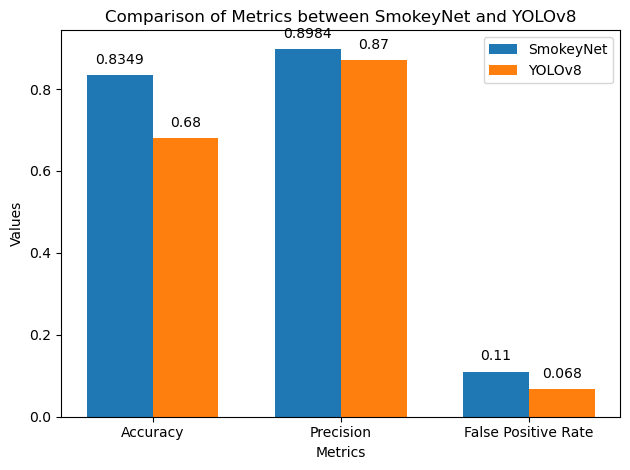

In [34]:
import matplotlib.pyplot as plt

# Values for the first set
A_1 = 0.8349
P_1 = 0.8984
FPR_1 = 0.11

# Values for the second set
A_2 = 0.68
P_2 = 0.87
FPR_2 = 0.068

# Labels for the metrics
metrics = ['Accuracy', 'Precision', 'False Positive Rate']

# Values for the first set
values_1 = [A_1, P_1, FPR_1]

# Values for the second set
values_2 = [A_2, P_2, FPR_2]

# Plotting
bar_width = 0.35
index = range(len(metrics))

plt.bar(index, values_1, bar_width, label='SmokeyNet')
plt.bar([i + bar_width for i in index], values_2, bar_width, label='YOLOv8')

# Add numerical values on top of each bar
for i, v in enumerate(values_1):
    plt.text(i, v + 0.02, str(round(v, 4)), ha='center', va='bottom')

for i, v in enumerate(values_2):
    plt.text(i + bar_width, v + 0.02, str(round(v, 4)), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics between SmokeyNet and YOLOv8')
plt.xticks([i + bar_width/2 for i in index], metrics)
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
# Given values
A = 0.68
P = 0.63
Recall = 0.90

# Calculate True Positives (TP)
TP = 1  # Just for illustration, the actual value should be given

# Calculate False Positives (FP)
FP = TP / P - TP

# Calculate False Negatives (FN)
FN = TP / Recall - TP

# Calculate True Negatives (TN)
TN = A * (TP + FP + FN) - TP

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

print("False Positive Rate (FPR):", FPR)

False Positive Rate (FPR): 0.7912745936698032
